# Exploratory Data Analysis - Titanic Dataset
## Objective: To find what pieces of data or patterns are highly associated with survival

### Importing dataset 

In [3]:
df <- read.csv("titanic_full.csv",stringsAsFactors=TRUE,na.strings=c("","NA"))

In [4]:
str(df)

'data.frame':	1309 obs. of  21 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 156 287 531 430 23 826 775 922 613 855 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 721 817 915 66 650 374 110 542 478 175 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 186 levels "A10","A11","A14",..: NA 107 NA 71 NA NA 164 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ WikiId     : int  691 90 865 127 627 785 200 1108 902 520 ...
 $ Name_wiki  : Factor w/ 1303 levels "Ã–dahl, Mr. Nils Martin",..: 195 321 547 452 26 373 788 929 631 869 ...

In [5]:
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,S,691,"Braund, Mr. Owen Harris",22,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NA,NA,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,...,C,90,"Cumings, Mrs. Florence Briggs (nÃ©e Thayer)",35,"New York, New York, US",Cherbourg,"New York, New York, US",4,####,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,S,865,"Heikkinen, Miss Laina",26,"JyvÃ¤skylÃ¤, Finland",Southampton,New York City,14?,####,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,S,127,"Futrelle, Mrs. Lily May (nÃ©e Peel)",35,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,####,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,S,627,"Allen, Mr. William Henry",35,"Birmingham, West Midlands, England",Southampton,New York City,NA,####,3
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,...,Q,785,"Doherty, Mr. William John (aka ""James Moran"")",22,"Cork, Ireland",Queenstown,New York City,NA,####,3


In [6]:
dim(df)

[1] 1309   21

In [7]:
nrow(df)

[1] 1309

In [8]:
ncol(df)

[1] 21

In [9]:
names(df)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "WikiId"      "Name_wiki"   "Age_wiki"   
[16] "Hometown"    "Boarded"     "Destination" "Lifeboat"    "Body"       
[21] "Class"

### Installing neccessary packages

In [11]:
library(dplyr)
library(ggcorrplot)
library(DataExplorer)
library(car)
library(vtreat)
library(janitor)
library(tidyr)
library(ggplot2)
options(warn=0)

### Descriptive Statistics 

In [12]:
summary(df)

  PassengerId      Survived          Pclass     
 Min.   :   1   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000  
 Median : 655   Median :0.0000   Median :3.000  
 Mean   : 655   Mean   :0.3838   Mean   :2.295  
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :1309   Max.   :1.0000   Max.   :3.000  
                NA's   :418                     
                               Name          Sex           Age       
 Connolly, Miss. Kate            :   2   female:466   Min.   : 0.17  
 Kelly, Mr. James                :   2   male  :843   1st Qu.:21.00  
 Abbing, Mr. Anthony             :   1                Median :28.00  
 Abbott, Master. Eugene Joseph   :   1                Mean   :29.88  
 Abbott, Mr. Rossmore Edward     :   1                3rd Qu.:39.00  
 Abbott, Mrs. Stanton (Rosa Hunt):   1                Max.   :80.00  
 (Other)                         :1301                NA's   :263    
     SibSp            Parch            Ticket   

Above summary gives us a lot of info about the descriptive stats of each variable specifically the numerical variables about their mean, median, Quantiles, etc. A lot of data in survived column is missing. More than 50% of the passengers belong to Class-3. Male passengers are almost twice that of female passengers. About 70% of the passengers boarded from Southampton. Likewise we can also identify the columns not useful from analysis point of view and also the reduntant columns.

### Analysing missing information 

In [13]:
colSums(is.na(df))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0         263 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1        1014           2 
     WikiId   Name_wiki    Age_wiki    Hometown     Boarded Destination 
          5           5           7           5           5           5 
   Lifeboat        Body       Class 
        807        1137           5

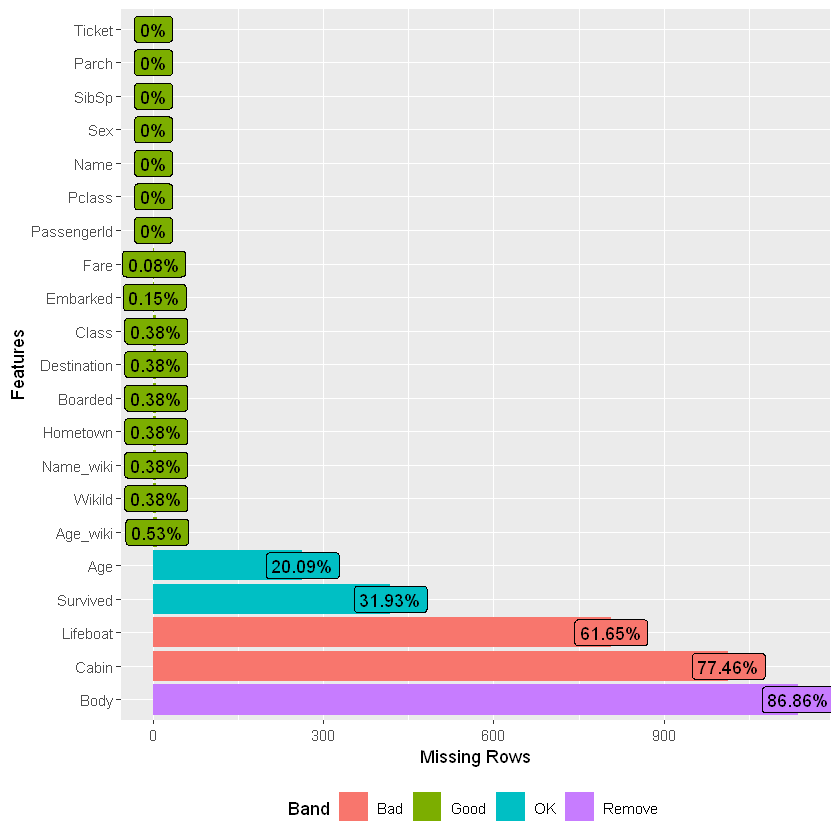

In [14]:
plot_missing(df)

Age is having 20% missing values, so it can be dropped and Age_wiki can be used in place of it. Survived is an important column because it our center point of investigation, so despite 32% missing values, we will not drop it and use it further discarding the rows with NA values. Other columns with significant % if missing values i.e Lifeboat, Caboin and Body can be dropped in further analysis and can be treated through a seperate dataframe if required to analyse these parameters.

In [15]:
#Conveting some numerical variables into their original nature that is categorical.

df$Survived <- as.factor(df$Survived)
df$Pclass <- as.factor(df$Pclass)

In [16]:
str(df)

'data.frame':	1309 obs. of  21 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 156 287 531 430 23 826 775 922 613 855 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 721 817 915 66 650 374 110 542 478 175 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 186 levels "A10","A11","A14",..: NA 107 NA 71 NA NA 164 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ WikiId     : int  691 90 865 127 627 785 200 1108 902 520 ...
 $ Name_wiki  : Factor w/ 1303 levels "Ã–dahl, Mr. Nils Mart

In [17]:
df1 <- select(df, -Age, -Lifeboat, -Cabin, -Body, -Class, -PassengerId)

In [18]:
names(df1)

[1] "Survived"    "Pclass"      "Name"        "Sex"         "SibSp"      
 [6] "Parch"       "Ticket"      "Fare"        "Embarked"    "WikiId"     
[11] "Name_wiki"   "Age_wiki"    "Hometown"    "Boarded"     "Destination"

In [19]:
df2 <- mutate(df1,fam_size = 1+SibSp+Parch)

In [20]:
names(df2)

[1] "Survived"    "Pclass"      "Name"        "Sex"         "SibSp"      
 [6] "Parch"       "Ticket"      "Fare"        "Embarked"    "WikiId"     
[11] "Name_wiki"   "Age_wiki"    "Hometown"    "Boarded"     "Destination"
[16] "fam_size"

### Correlation analysis to understand the relationship between numerical variables  

In [21]:
df_omit <- na.omit(df2)
df_num <- df_omit %>% select_if(is.numeric)

In [23]:
library(GGally)

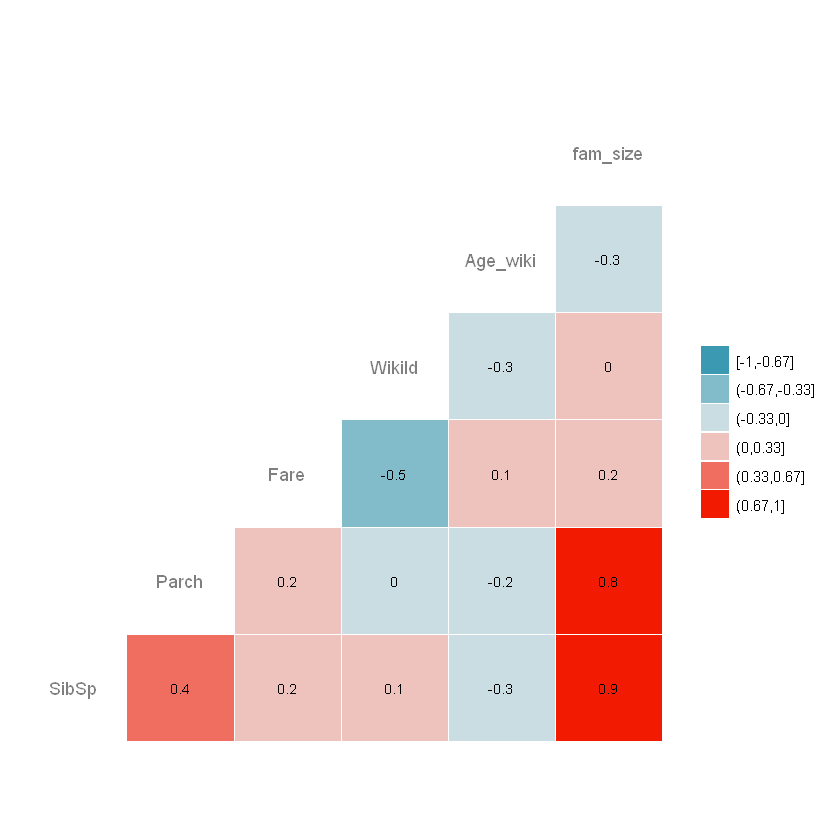

In [24]:
ggcorr(df_num,
       nbreaks = 6,
       label = TRUE,
       label_size = 3,
       color = 'grey50')

### Multivariate Analysis of Survival with respect to different dimensions
### (Age, Gender, Passenger class)

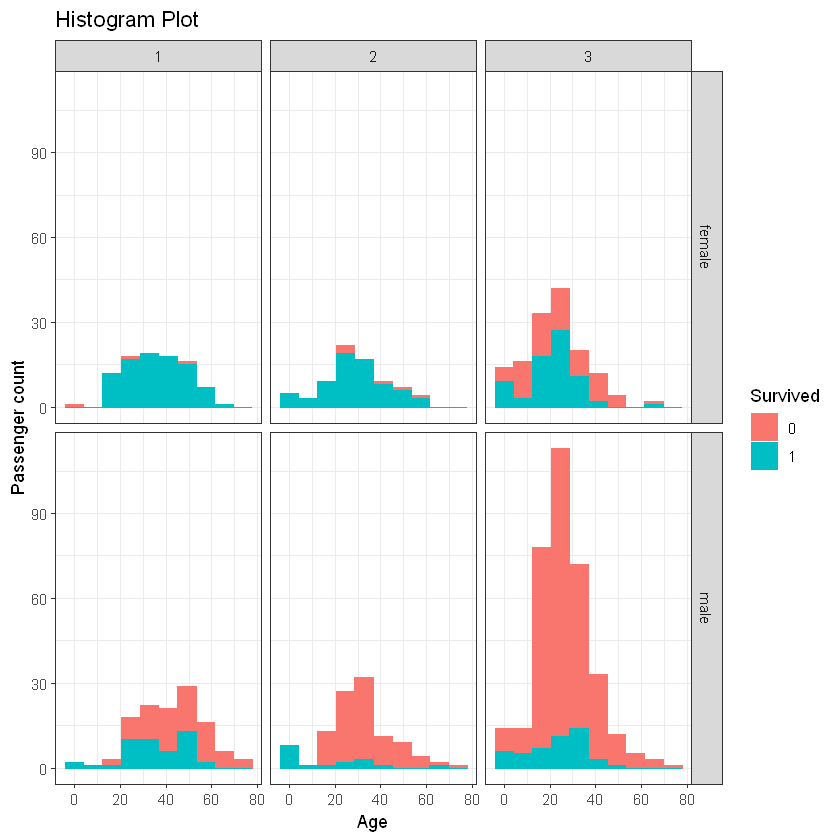

In [25]:
ggplot(df_omit)+aes(x=Age_wiki, colour=Survived, fill=Survived)+geom_histogram(bins=10)+facet_grid(Sex~Pclass)+theme_bw()+
labs(title="Histogram Plot",x="Age",y="Passenger count")

This is four dimensional chart. We can observe that survival rate of children are highest. Females have comparatively higher survival rate than males. So we can definitely say "Women and children first". Also we can see that the females across all ages in first and second class, almost 98-99% survived but unfortunately not in third class. First Class passengers have higher survival rate but within that if the passenger is young or middle aged man, than the chances of survival is low. Third class has the lowest survival rate. So overall as the age increases, moving from female to male passengers and the passenger class goes from first to second to third, the survival rate decreases.

### Age distribution analysis with respect to survival and gender 

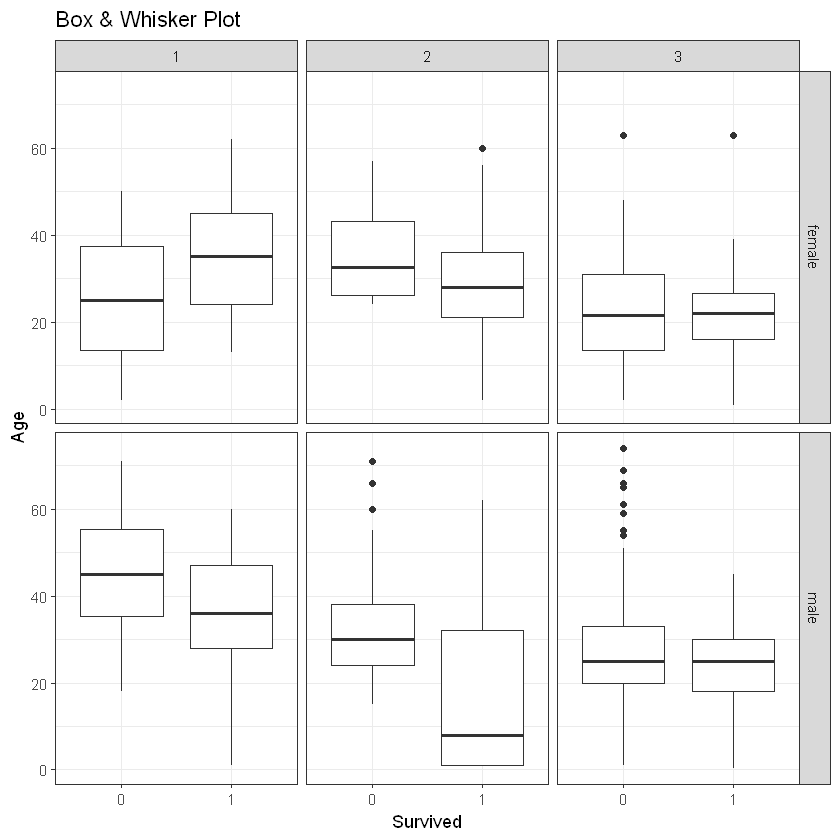

In [26]:
ggplot(df_omit)+aes(x=Survived, y=Age_wiki)+geom_boxplot()+facet_grid(Sex~Pclass)+theme_bw()+
labs(title="Box & Whisker Plot",x="Survived",y="Age")

We can observe from the box plot above that for females in Pclass1, 50% of the perished people lie in the age 12-38 and survived in the age 25-45. Similar inferences can be drawn for males across different passenger class. The eye catching plot here is the males in the Pclass2, where there is wide dispersion of age for the survivors but the age distribution is rightly skewed. There is no significant skewness in other plots.

### Analysis with respect to Boarding Location 

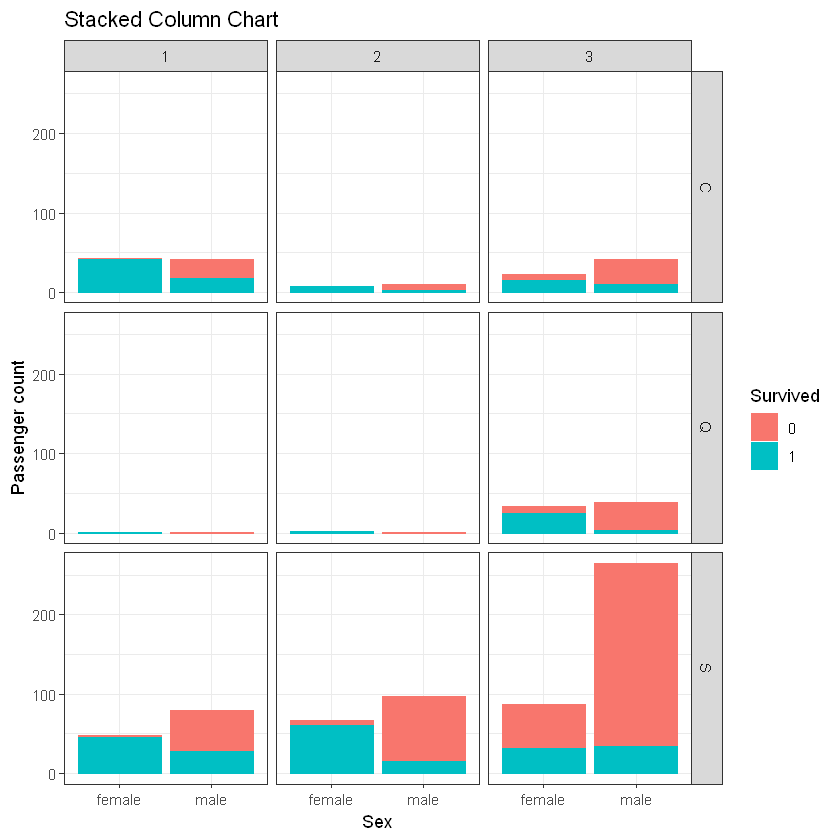

In [27]:
ggplot(df_omit)+aes(x=Sex, colour=Survived, fill=Survived)+geom_bar()+facet_grid(Embarked~Pclass)+theme_bw()+
labs(title="Stacked Column Chart",x="Sex",y="Passenger count")

So highest number of passengers boarded from Southampton. Highest percentage of people boarding from Cherbourg travelled through Class1. Very few people boarded from Queenstown travelled in Class1 and 2. It is evident that highest number of people who perished were males travelling in Class3 from Southampton.

### Analysis with respect to Family size 

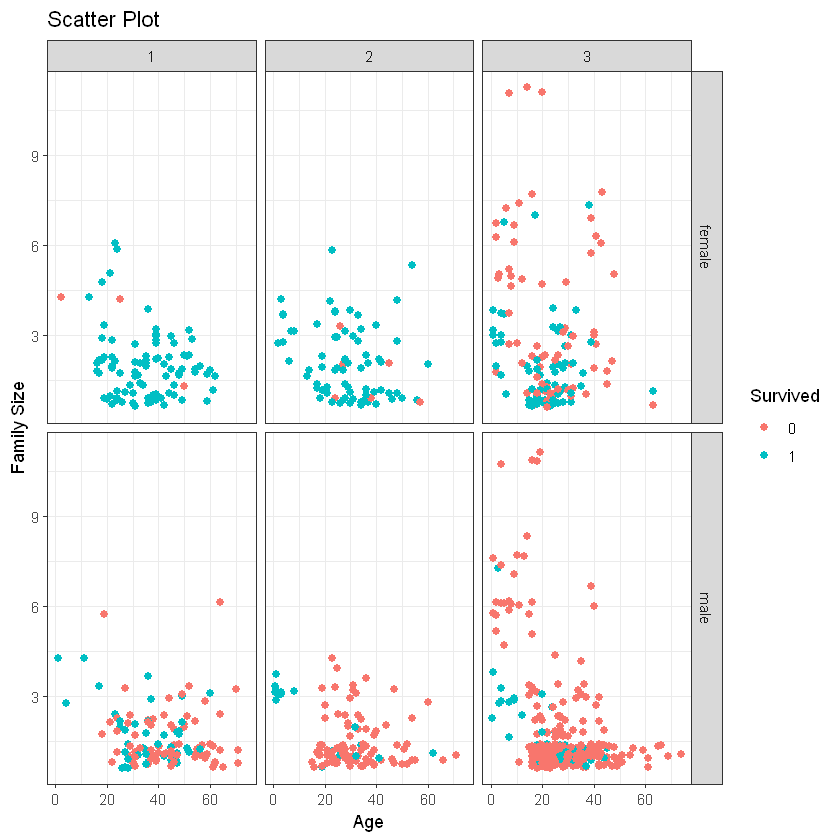

In [28]:
ggplot(df_omit)+aes(x=Age_wiki, y=fam_size, colour=Survived)+geom_jitter(size=2)+facet_grid(Sex~Pclass)+theme_bw()+
labs(title="Scatter Plot",x="Age",y="Family Size")

People belonging to family size of above 5 have mostly not survived. Most of the people in larger family are travelling through Class3. Most of the passengers are male travelling single. Most of the kids below age 10 are travelling in a family of 3 most probably accompanied by their parents and have survived.

Please Note: We introduced a bit of jitter (randomness to family size data in terms of decimal pts) or else the family size would have been same whole no. for many passengers and the dots on the scatter plot would have overlapped completely. We only use jitter for visualization. Not for any statistical or machine learning.

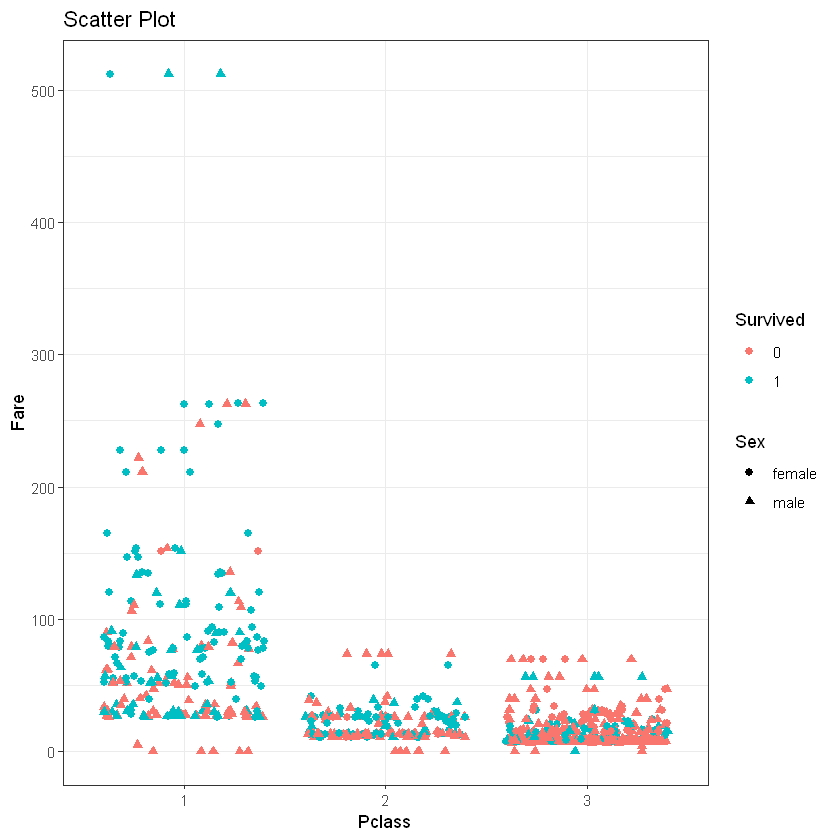

In [29]:
ggplot(df_omit)+aes(x=Pclass, y=Fare, colour=Survived, shape=Sex)+geom_jitter(size=2)+theme_bw()+
labs(title="Scatter Plot",x="Pclass",y="Fare")

We noticed that fares in Class 1 are significantly higher than other other class and most of the female passengers travelling through this class have survived. The fare values are highly scattered for class1 as compared to other two class, could be due to additional facilities and subdivisions in the first class services.

### Analysing the life saving boats with the number of lives saved 

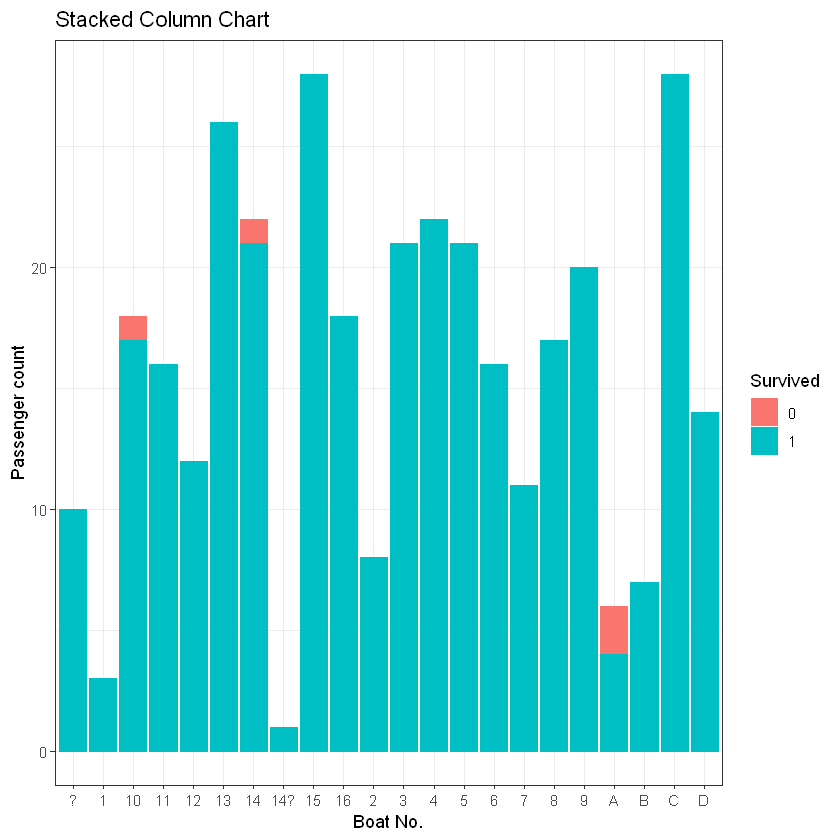

In [30]:
df_life <- filter(df, Lifeboat != "NA", Survived != "NA")

ggplot(df_life)+aes(x=Lifeboat, colour=Survived, fill=Survived)+geom_bar()+theme_bw()+
labs(title="Stacked Column Chart",x="Boat No.",y="Passenger count")

Above chart shows that all the life boats listed in the dataset, saved atleast one passenger. Mostly saved 10+ passengers. Life boat 13, 15 and C saved the most, more than 25+ passengers each. Some passengers on the boat 10, 14 and A could not survive. 

In [31]:
#Title and surname extraction
#From the list of given names we are extracting the title from all the names
#Here, we are also using regular expressions to clean the extraneous characters in the Title column.

In [32]:
df1$Title <- gsub("(.*, )|(\\..*)","",df1$Name)
table(df1$Sex, df1$Title)

        
         Capt Col Don Dona  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs
  female    0   0   0    1   1        0    1     0      0  260    2   1   0 197
  male      1   4   1    0   7        1    0     2     61    0    0   0 757   0
        
          Ms Rev Sir the Countess
  female   2   0   0            1
  male     0   8   1            0

In [33]:
# Title with very low cell counts is combined in "Misc" type
rareTitle <- c("Dona", "Lady","the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer")

# Also reassign "Mlle", "Mme" and "Ms" accordingly
df1$Title[df1$Title == "Mlle"] <- "Miss"
df1$Title[df1$Title == "Ms"] <- "Miss"
df1$Title[df1$Title == "Mme"] <- "Mrs"
df1$Title[df1$Title %in% rareTitle] <- "Misc Title"

# Show Title Counts by Sex again
table(df1$Sex, df1$Title)

        
         Master Misc Title Miss  Mr Mrs
  female      0          4  264   0 198
  male       61         25    0 757   0

### Statistical Testing 

In [34]:
#Performing chi square test on the data
#Null hypothesis : Title of the passengers and survival chances are dependent in nature.

In [35]:
stats_df1 <- data.frame(df1$Title, df1$Fare)

# Create a table with the needed variables.
table_df1 <- table(df1$Title, df1$Survived) 
print(table_df1)

            
               0   1
  Master      17  23
  Misc Title  15   8
  Miss        55 130
  Mr         436  81
  Mrs         26 100


In [36]:
print(chisq.test(table_df1))


	Pearson's Chi-squared test

data:  table_df1
X-squared = 288.12, df = 4, p-value < 2.2e-16



As the p value comes out to be less than 0.05 we reject the null hypothesis. Hence the Title has no impact on the survival of the passengers.